In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle as pkl
from descartes import PolygonPatch

from geopy.geocoders import Nominatim

import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize
import numpy as np

In [71]:
def buffer_mi(df, miles):
    """takes geopandas dataframe and returns a buffer of miles from that point/polygon
    Args:
        df (geopandas dataframe) - geopandas dataframe to convert
        mile - number of miles that buffer is from points in geometry  
    Returns:
        convertedDF - new geopandas dataframe that has a polygon that is m miles buffer from original geometry
    """
    #Getting mile buffer for the outside of Tempe
    convertedDF = df.to_crs({'init': 'epsg:3174'})
    
    #converting from miles to meters
    buffer_length_in_meters = (miles * 1000) * 1.60934
    convertedDF['geometry'] = convertedDF.geometry.buffer(buffer_length_in_meters)

    convertedDF = convertedDF.to_crs({'init': 'epsg:4326'})
    
    convertedDF.reset_index(inplace=True)
    convertedDF.drop(['index'], axis=1, inplace=True)
    return(convertedDF)


def facility_within_cinbuffer(geo_df, cinbuffer):
    """takes geopandas dataframe and returns the points that are within the Tempe buffer
    Args:
        geo_df (geopandas dataframe) - geopandas dataframe to pull points from
        tempebuffer - geopandas dataframe made of the Cincinnati city mile buffer
    Returns:
        df_mi - new geopandas dataframe that the points within the Cincinnati buffer
    """
    df_mi = pd.DataFrame()
    for i in range(len(cinbuffer)):
        df = geo_df[geo_df.within(cinbuffer.loc[i,'geometry'])]
        df_mi = df_mi.append(df)
    df_mi.reset_index(inplace=True)
    df_mi.drop(['index'], axis=1, inplace=True)
    return(df_mi)

# Cincinnati City Boundary and Cincinnati Neighborhood Boundary

In [4]:
url = 'https://cagisonline.hamilton-co.org/arcgis/rest/services/COUNTYWIDE/CensusBoundaries/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

cinci_census = gpd.read_file(url)
cinci_census.head()

,OBJECTID,TRACTCE10,geometry
0,1,005200,"POLYGON ((-84.43168 39.15720, -84.43177 39.156..."
1,2,005301,"POLYGON ((-84.42516 39.15576, -84.42513 39.155..."
2,3,005302,"POLYGON ((-84.40766 39.15576, -84.40748 39.155..."
3,4,005400,"POLYGON ((-84.42096 39.16456, -84.41972 39.163..."
4,5,005500,"POLYGON ((-84.39799 39.17441, -84.39800 39.174..."


In [24]:
len(cinci_census)

222

In [51]:
tracts = []
for x in res_intersection['TRACTCE10']:
    #x = x[0:]
    n = x[:2]
    #print(x)
    if n == '00':
        x = x[2:]
        x = x[:2] + '.' + x[2:4]
    else:
        n = x[:1]
        x = x[1:]
        x = x[:3] + '.' + x[3:5]
    tracts.append(x)

res_intersection['TRACTCE10'] = tracts

In [54]:
res_intersection = res_intersection[res_intersection['TRACTCE10'] != '208.11']

In [72]:
url = 'https://cagisonline.hamilton-co.org/arcgis/rest/services/CINC_PLANNING/Cincinnati_Boundaries/MapServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json'

cinbdry = gpd.read_file(url)
cinbdry.head()

with open('DataFiles/SpatialAreas/CincinnatiCityBoundary.pkl', 'wb') as pkl_file:
    pkl.dump(cinbdry, pkl_file)
    

In [6]:
res_intersection = gpd.overlay(cinci_census, cinbdry, how='intersection')

res_intersection

,OBJECTID_1,TRACTCE10,OBJECTID_2,CAGIS.Cinc_City_Boundary.AREA,PERIMETER,BND_NAME,SQMI,GLOBALID,SHAPE.AREA,SHAPE.LEN,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,geometry
0,1,005200,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.43168 39.15720, -84.43177 39.156..."
1,2,005301,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.42516 39.15576, -84.42513 39.155..."
2,3,005302,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.40766 39.15576, -84.40748 39.155..."
3,4,005400,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.42096 39.16456, -84.41972 39.163..."
4,5,005500,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"MULTIPOLYGON (((-84.39309 39.16722, -84.39303 ..."
5,6,005600,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.38018 39.15968, -84.38008 39.159..."
6,7,005701,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.41997 39.19351, -84.42001 39.193..."
7,8,005702,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.43147 39.18096, -84.43150 39.180..."
8,9,005800,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.41132 39.19116, -84.41135 39.190..."
9,10,005900,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.44782 39.18262, -84.44663 39.182..."


In [ ]:
tracts = []
for x in res_intersection['TRACTCE10']:
    #x = x[0:]
    n = x[:2]
    #print(x)
    if n == '00':
        x = x[2:]
        x = x[:2] + '.' + x[2:4]
    else:
        n = x[:1]
        x = x[1:]
        x = x[:3] + '.' + x[3:5]
    tracts.append(x)

res_intersection['TRACTCE10'] = tracts

In [ ]:
res_intersection = res_intersection[res_intersection['TRACTCE10'] != '208.11']

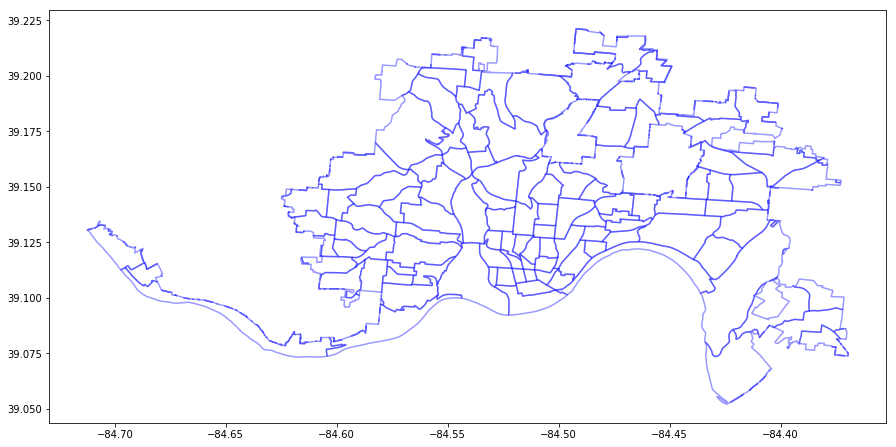

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.plot(ax=ax, color='grey',alpha=0.1)
#cinci_census.boundary.plot(ax=ax, color='black', alpha=0.2)
#cinbdry.boundary.plot(ax=ax, color='blue',linewidth=2)
res_intersection.boundary.plot(ax=ax, color='blue',alpha=0.4)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Hamilton County Census Tracts (black) and Cincinnati Outline (blue)')

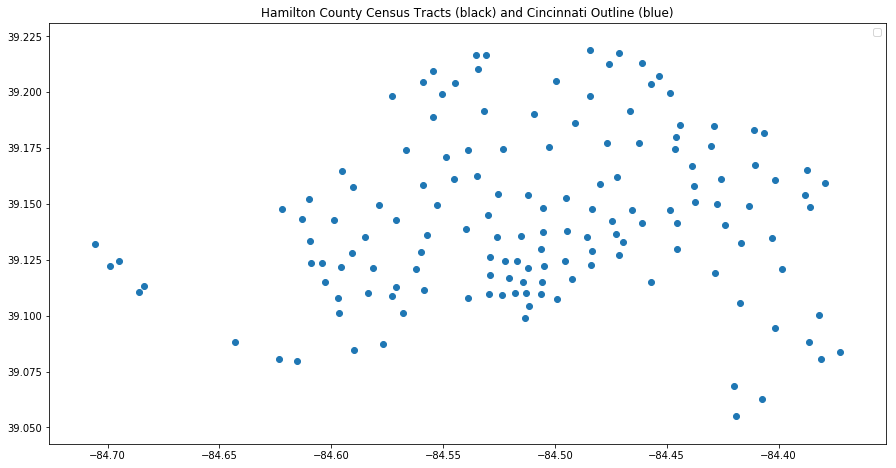

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.plot(ax=ax, color='grey',alpha=0.1)
#cinci_census.boundary.plot(ax=ax, color='black')
#cinbdry.boundary.plot(ax=ax, color='blue',linewidth=2)
#res_intersection.plot(ax=ax, color='blue',alpha=0.1)
res_intersection.centroid.plot(ax=ax)
plt.legend()
plt.title("Hamilton County Census Tracts (black) and Cincinnati Outline (blue)")

In [65]:
len(res_intersection.centroid)

res_intersection.reset_index(inplace=True)
res_intersection.drop(['index'], axis=1, inplace=True)

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
for i in range(len(res_intersection)):
    #print(i)
    name = res_intersection.loc[i,'TRACTCE10']
    geometry = res_intersection.loc[i, 'geometry']
    cent = geometry.centroid
    print(name)
    #print(geometry)
    print(cent)

52.00
POINT (-84.43717451303709 39.15092613930175)
53.01
POINT (-84.42746643703299 39.14995854039083)
53.02
POINT (-84.41327494034977 39.14890537255343)
54.00
POINT (-84.42587134842957 39.16126148854225)
55.00
POINT (-84.401813647384 39.16069096490372)
56.00
POINT (-84.38819186324139 39.15382653159347)
57.01
POINT (-84.42876957198564 39.18491310746934)
57.02
POINT (-84.43020871238787 39.17563958221373)
58.00
POINT (-84.41103635423148 39.18307547382967)
59.00
POINT (-84.44588558806274 39.17963028404267)
60.00
POINT (-84.47568787541034 39.21230557195523)
61.00
POINT (-84.48416547058605 39.19827870632892)
63.00
POINT (-84.46246950023854 39.17723217890131)
64.00
POINT (-84.47654553335197 39.17722822488354)
65.00
POINT (-84.47979523444452 39.15886129166878)
213.04
POINT (-84.62311504920454 39.0804936804908)
214.01
POINT (-84.5967213537371 39.10107666601399)
214.21
POINT (-84.61529528862853 39.07970992410027)
214.22
POINT (-84.58973824826607 39.08450927722037)
218.01
POINT (-84.5350933003436

**Since the Census doesn't overlay the best here are the SNA Neighborhood boundaries

https://data-cagisportal.opendata.arcgis.com/datasets/cincinnati-sna-boundary/geoservice

In [73]:
url = 'https://cagisonline.hamilton-co.org/arcgis/rest/services/CINC_PLANNING/Cincinnati_Boundaries/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

cinneigh = gpd.read_file(url)
cinneighC = gpd.read_file(url)
cinneigh.head()

resp = requests.get(url)
print(resp)

data_raw = resp.json()

cn_data = pd.io.json.json_normalize(data_raw['features'])

cn_data


<Response [200]>


,attributes.ACRES,attributes.CAGIS.Cinc_SNA_Boundary_2010.AREA,attributes.OBJECTID,attributes.PERIMETER,attributes.SHAPE.AREA,attributes.SHAPE.LEN,attributes.SNA_NAME,attributes.SNA_NUMBER,geometry.rings
0,958.705,4.176103e+07,37,31333.996,0,0,Queensgate,37,"[[[-84.54225959503427, 39.124580514488116], [-..."
1,1034.291,4.505356e+07,40,42627.920,0,0,Roselawn,39,"[[[-84.45726961451476, 39.21143880455258], [-8..."
2,648.581,2.825207e+07,21,31405.973,0,0,Kennedy Heights,20,"[[[-84.41099862506424, 39.1944719063332], [-84..."
3,1083.910,4.721495e+07,36,49240.166,0,0,Pleasant Ridge,36,"[[[-84.41996716120343, 39.19351566696837], [-8..."
4,3733.891,1.626476e+08,49,69602.012,0,0,Westwood,49,"[[[-84.5778147972755, 39.16476389226687], [-84..."
5,324.695,1.414365e+07,23,23015.881,0,0,Lower Price Hill,22,"[[[-84.54398871892408, 39.10112019251062], [-8..."
6,2113.318,9.205577e+07,30,80360.508,0,0,Mt. Washington,29,"[[[-84.39710700526196, 39.10476132552921], [-8..."
7,276.670,1.205170e+07,34,19081.911,0,0,Over-the-Rhine,34,"[[[-84.52593513843325, 39.12174026723285], [-8..."
8,1359.792,5.923230e+07,4,45187.118,0,0,California,3,"[[[-84.4197915558526, 39.081325511823145], [-8..."
9,2489.171,1.084279e+08,8,75006.576,0,0,College Hill,7,"[[[-84.53301868921504, 39.216838925271354], [-..."


In [74]:

desired_cols = ['attributes.SNA_NAME']

cnName_df = cn_data[desired_cols]

cnName_df.columns =['Name']

nameList = cnName_df['Name'].values.astype(str)
nameList
nameList1 = []
for i in nameList:
    nameList1.append(str(i))

In [75]:
cinbdry_2mi = buffer_mi(cinbdry, 2)

In [76]:
cinneighC['geometry'] = cinneighC.centroid
cinCentroidConvertedB = buffer_mi(cinneighC, 2)
cinCentroidConvertedB.head()

,ACRES,PERIMETER,SNA_NAME,SNA_NUMBER,OBJECTID,CAGIS.Cinc_SNA_Boundary_2010.AREA,SHAPE.AREA,SHAPE.LEN,geometry
0,735.160,33190.393,North Avondale - Paddock Hills,30,1,3.202344e+07,0.0,0.0,"POLYGON ((-84.44343 39.15986, -84.44361 39.157..."
1,1384.381,40788.956,Avondale,1,2,6.030341e+07,0.0,0.0,"POLYGON ((-84.45865 39.14605, -84.45883 39.143..."
2,1178.143,34116.318,Bond Hill,2,3,5.131972e+07,0.0,0.0,"POLYGON ((-84.43469 39.17722, -84.43487 39.174..."
3,1359.792,45187.118,California,3,4,5.923230e+07,0.0,0.0,"POLYGON ((-84.38305 39.06850, -84.38323 39.065..."
4,799.599,28878.625,Camp Washington,4,5,3.483040e+07,0.0,0.0,"POLYGON ((-84.50278 39.13865, -84.50295 39.135..."


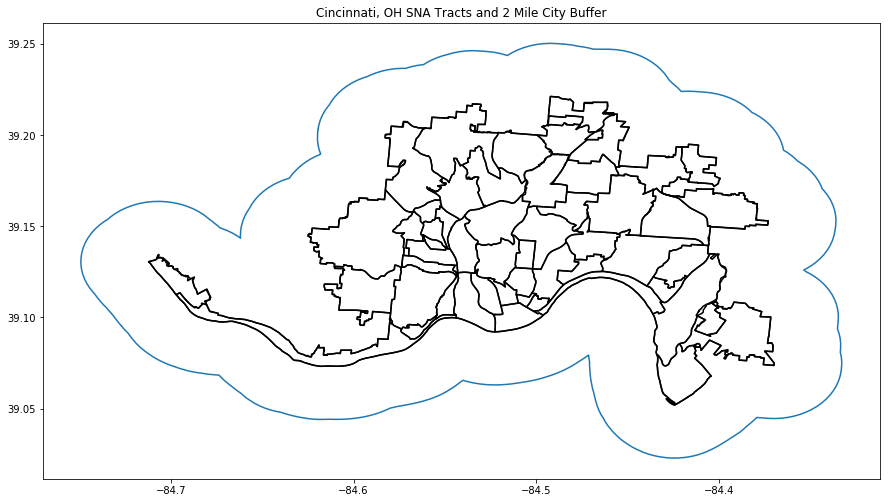

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
cinneigh.boundary.plot(ax=ax, color='black')
#cinneigh.centroid.plot(ax=ax, color='red')
plt.title("Cincinnati, OH SNA Tracts and 2 Mile City Buffer")
plt.savefig('CinNeigh2Mile.png')

# Medical Facilities

Cincinnati:
http://publicapps.odh.ohio.gov/EDW/DataBrowser/Browse/OhioOneSource#details


In [90]:
def create_geo_df_mf(df):
    """takes url and returns geopandas dataframe used for the Medical facilities.
    Args:
        url - queried from ArcGIS
        layer - name of the feature layer data was pulled from
    Returns:
        geo_df - new geopandas dataframe from that url
    """
    desired_cols = ['Business Type','Business Name', 'Location Address Line 1', 
                    'Location City', 'Location Zip', 
                    'Location County','LocationLat', 'LocationLong']

    medF_df = df[desired_cols]

    medF_df.columns =['TYPE', 'NAME', 'ADDRESS', 
                      'CITY', 'ZIP', 
                      'COUNTY','Lat', 'Long']

    crs = {'init': 'epsg:4326'}
    cin_med = pd.DataFrame(medF_df)

    geometry = [Point(xy) for xy in zip(cin_med['Long'],cin_med['Lat'])]

    geo_df = gpd.GeoDataFrame(cin_med, crs = crs, geometry = geometry)
    
    return(geo_df)

def create_geo_df_mf_ky(df):
    """takes url and returns geopandas dataframe used for the Medical facilities.
    Args:
        url - queried from ArcGIS
        layer - name of the feature layer data was pulled from
    Returns:
        geo_df - new geopandas dataframe from that url
    """
    crs = {'init': 'epsg:4326'}
    
    ky_med = pd.DataFrame(df)
    ky_med.drop(['Unnamed: 0'], axis=1, inplace=True)
    
    geometry = [Point(xy) for xy in zip(ky_med['Long'],ky_med['Lat'])]

    geo_df = gpd.GeoDataFrame(ky_med, crs = crs, geometry = geometry)
    
    return(geo_df)

from osgeo import ogr
def counting_facilities_cn(df_2mi):
    """takes geopandas dataframe and returns the points that are within the Cincinnati buffer
    Args:
        convertedDF (geopandas dataframe) - mile buffer geopandas dataframe to count facilities from
    Returns:
        medfCounts (lst) - list of the number of facility buffer polygons 
                            (an m mile ring from the facility location) that 
                            contain the centroid of the neighborhood
    """
    df_2mi.reset_index(inplace=True)
    df_2mi.drop(['index'], axis=1, inplace=True)
    counts = {}
    medCounts = []
    n = len(df_2mi)-1
    for i in range(len(cinCentroidConvertedB)):
        loc1 = cinCentroidConvertedB.loc[i,'geometry']
        name = cinneigh.loc[i, 'SNA_NAME']
        fCount = 0
        for j in range(len(df_2mi)):
            loc2 = df_2mi.loc[j,'geometry']
            intersection = loc1.contains(loc2)
            if intersection == True:
                fCount += 1
            if j == n:
                counts[name] = fCount
                medCounts.append(fCount)
    print(counts)
    return(medCounts)

In [91]:
#Cincinnati
oh_mf = pd.read_csv('cincinnati/OhioOneSource_Export_Facilities.csv')
oh_mf.head()
types = np.unique(oh_mf['Business Type'].astype(str))
types = list(types)
print(types)


['ChildFacility', 'Hospice', 'HospitalsChild', 'HospitalsGeneral', 'HospitalsPsych', 'MedicalFacility', 'Mental', 'NursingAssisted', 'PainManagement', 'PhysicalTherapy', 'SubstanceHelp', 'Surgery', 'UrgentCare', 'WomensClinic']


In [92]:
geomf_df = create_geo_df_mf(oh_mf)
geomf_df.head()

,TYPE,NAME,ADDRESS,CITY,ZIP,COUNTY,Lat,Long,geometry
0,MedicalFacility,PROCTER AND GAMBLE COMPANY VIBRANT LIVING HEAL...,1 Procter And Gamble Plz,Cincinnati,45202,Hamilton,39.102946,-84.507396,POINT (-84.50740 39.10295)
1,UrgentCare,THE LITTLE CLINIC OF OHIO LLC,1 W Corry St,Cincinnati,45219,Hamilton,39.128980,-84.509815,POINT (-84.50982 39.12898)
2,MedicalFacility,GOOD SAMARITAN HOSPITAL - TRIHEALTH EVENT MEDI...,100 Joe Nuxhall Way,Cincinnati,45202,Hamilton,39.096183,-84.508185,POINT (-84.50818 39.09618)
3,MedicalFacility,WALNUT STREET HEALTH CENTER,1005 Walnut St,Cincinnati,45202,Hamilton,39.106734,-84.512886,POINT (-84.51289 39.10673)
4,NursingAssisted,"SHAWNEESPRING HEALTH CARE CENTER, LLC",10111 SIMONSON ROAD,HARRISON,45030,HAMILTON,39.236624,-84.779800,POINT (-84.77980 39.23662)


In [93]:
geomf_df = geomf_df[geomf_df['Lat']!=0]
geomf_df.head()

,TYPE,NAME,ADDRESS,CITY,ZIP,COUNTY,Lat,Long,geometry
0,MedicalFacility,PROCTER AND GAMBLE COMPANY VIBRANT LIVING HEAL...,1 Procter And Gamble Plz,Cincinnati,45202,Hamilton,39.102946,-84.507396,POINT (-84.50740 39.10295)
1,UrgentCare,THE LITTLE CLINIC OF OHIO LLC,1 W Corry St,Cincinnati,45219,Hamilton,39.128980,-84.509815,POINT (-84.50982 39.12898)
2,MedicalFacility,GOOD SAMARITAN HOSPITAL - TRIHEALTH EVENT MEDI...,100 Joe Nuxhall Way,Cincinnati,45202,Hamilton,39.096183,-84.508185,POINT (-84.50818 39.09618)
3,MedicalFacility,WALNUT STREET HEALTH CENTER,1005 Walnut St,Cincinnati,45202,Hamilton,39.106734,-84.512886,POINT (-84.51289 39.10673)
4,NursingAssisted,"SHAWNEESPRING HEALTH CARE CENTER, LLC",10111 SIMONSON ROAD,HARRISON,45030,HAMILTON,39.236624,-84.779800,POINT (-84.77980 39.23662)


In [94]:
geomf_df = facility_within_cinbuffer(geomf_df, cinbdry_2mi)
len(geomf_df)

246

In [95]:
#Kentucky
ky_mf = pd.read_csv('DataFiles/FacilityData/MedicalFacilitiesIn12miKYgeo.csv')
ky_mf.head()
types = np.unique(ky_mf['TYPE'].astype(str))
types = list(types)
print(types)

['ChildFacility', 'Hospice', 'HospitalsGeneral', 'HospitalsPsych', 'MedicalFacility', 'Mental', 'NursingHome', 'PainManagement', 'PhysicalTherapy', 'SubstanceHelp', 'Surgery', 'UrgentCare', 'WomenClinic']


In [86]:
ky_mf.columns

Index(['Unnamed: 0', 'TYPE', 'NAME', 'ADDRESS', 'CITY', 'ZIP', 'COUNTY',
       'Layer', 'Lat', 'Long', 'geometry'],
      dtype='object')

In [96]:
geomf_ky_df = create_geo_df_mf_ky(ky_mf)
#geomf_ky_df.head()
geomf_ky_df = facility_within_cinbuffer(geomf_ky_df, cinbdry_2mi)


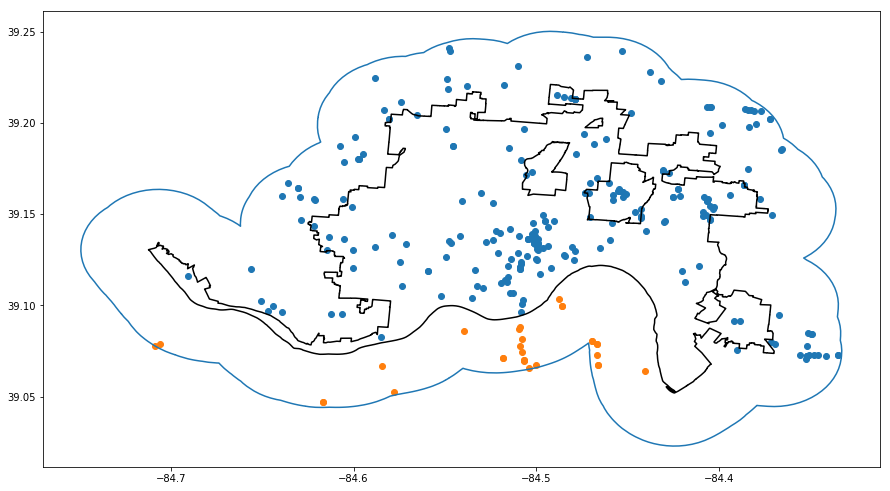

In [97]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
geomf_df['geometry'].plot(ax=ax)
geomf_ky_df['geometry'].plot(ax=ax)

In [98]:
print(np.unique(geomf_ky_df['TYPE']))
print(np.unique(geomf_df['TYPE']))
hospitals_gen = geomf_ky_df[geomf_ky_df['TYPE'] == 'HospitalsGeneral']
hospitals_gen = hospitals_gen.append(geomf_df[geomf_df['TYPE'] == 'HospitalsGeneral'], ignore_index=True)

hospitals_ment = geomf_ky_df[geomf_ky_df['TYPE'] == 'HospitalsPsych']
hospitals_ment = hospitals_ment.append(geomf_df[geomf_df['TYPE'] == 'HospitalsPsych'], ignore_index=True)

surgical_centers = geomf_df[geomf_df['TYPE'] == 'Surgery']

urgent_care = geomf_df[geomf_df['TYPE'] == 'UrgentCare']
urgent_care = urgent_care.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'UrgentCare'], ignore_index=True)

womens_clinics = geomf_df[geomf_df['TYPE'] == 'WomensClinic']
womens_clinics = womens_clinics.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'WomenClinic'], ignore_index=True)

pain_management = geomf_df[geomf_df['TYPE'] == 'PainManagement']
pain_management = pain_management.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'PainManagement'], ignore_index=True)

physical_therapy = geomf_df[geomf_df['TYPE'] == 'PhysicalTherapy']

mental_facilities = geomf_df[geomf_df['TYPE'] == 'Mental']
mental_facilities = mental_facilities.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'Mental'], ignore_index=True)

substance_help = geomf_df[geomf_df['TYPE'] == 'SubstanceHelp']
substance_help = substance_help.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'SubstanceHelp'], ignore_index=True)

med_2mi = geomf_df[geomf_df['TYPE'] == 'MedicalFacility']
med_2mi = med_2mi.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'MedicalFacility'], ignore_index=True)

nursing_assisted = geomf_df[geomf_df['TYPE'] == 'NursingAssisted']
nursing_assisted = nursing_assisted.append(geomf_ky_df[geomf_ky_df['TYPE'] == 'NursingHome'], ignore_index=True)

hospice_centers = geomf_df[geomf_df['TYPE'] == 'Hospice']

child_hospitals = geomf_df[geomf_df['TYPE'] == 'HospitalsChild']

child_facilities = geomf_ky_df[geomf_ky_df['TYPE'] == 'ChildFacility']


['ChildFacility' 'HospitalsGeneral' 'HospitalsPsych' 'MedicalFacility'
 'Mental' 'NursingHome' 'PainManagement' 'SubstanceHelp' 'UrgentCare'
 'WomenClinic']
['Hospice' 'HospitalsChild' 'HospitalsGeneral' 'HospitalsPsych'
 'MedicalFacility' 'Mental' 'NursingAssisted' 'PainManagement'
 'PhysicalTherapy' 'SubstanceHelp' 'Surgery' 'UrgentCare' 'WomensClinic']


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [99]:
facilities_2mi = pd.concat([hospitals_gen,hospitals_ment, surgical_centers,urgent_care,womens_clinics,
                           pain_management, physical_therapy, mental_facilities, substance_help,
                           med_2mi, nursing_assisted,hospice_centers, child_hospitals, child_facilities],axis=0,
                           ignore_index=True,sort=False)

In [100]:
with open('DataFiles/medicalFacilitiesWithin2milesCinFULL.pkl', 'wb') as pkl_file:
    pkl.dump(facilities_2mi, pkl_file)

with open('DataFiles/FacilityData/medicalFacilitiesWithin2milesCinFULL.pkl', 'wb') as pkl_file:
    pkl.dump(facilities_2mi, pkl_file)
    
facilities_2mi.to_csv(r'DataFiles/FacilityData/MedicalFacilitiesWithin2milesCinFULL.csv')


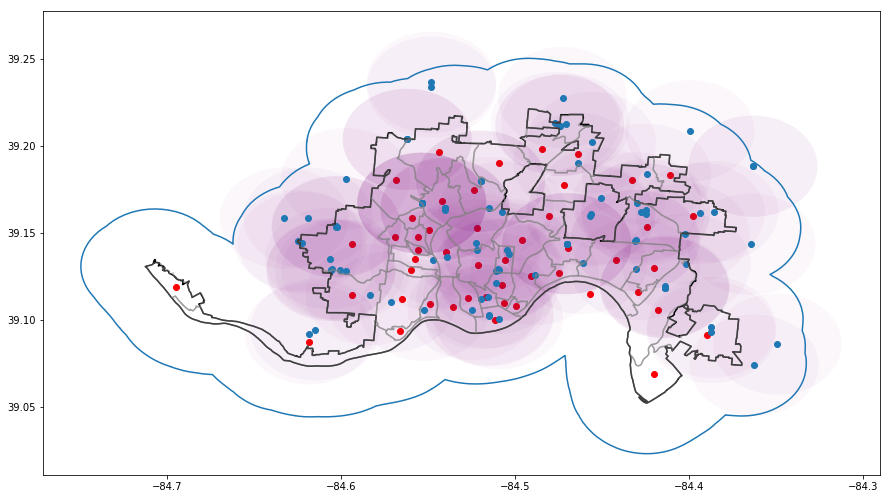

In [442]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
cinneigh.boundary.plot(ax=ax, color='grey', alpha=0.5)
cinneigh.centroid.plot(ax=ax, color='red')
cinNConvertedB.plot(ax=ax, color='purple',alpha=0.03)
geocn_df.plot(ax=ax)

In [20]:
medFacCindf = pd.DataFrame()

medFacCindf['NeighborhoodName'] = nameList1
medFacCindf['NeighborhoodNum'] = cinneigh['SNA_NUMBER']
medFacCindf['HospitalsGeneralCount2mi'] = counting_facilities_cn(hospitals_gen)
medFacCindf['HospitalsPsychCount2mi'] = counting_facilities_cn(hospitals_ment)
medFacCindf['SurgicalCentersCount2mi'] = counting_facilities_cn(surgical_centers)
medFacCindf['UrgentCareCount2mi'] = counting_facilities_cn(urgent_care)
medFacCindf['WomensClinicsCount2mi'] = counting_facilities_cn(womens_clinics)
medFacCindf['PainManagementCount2mi'] = counting_facilities_cn(pain_management)
medFacCindf['PhysicalTherapyCount2mi'] = counting_facilities_cn(physical_therapy)
medFacCindf['MentalFacilitiesCount2mi'] = counting_facilities_cn(mental_facilities)
medFacCindf['SubstanceAbuseCount2mi'] = counting_facilities_cn(substance_help)
medFacCindf['OtherMedicalFacilitesCount2mi'] = counting_facilities_cn(med_2mi)
medFacCindf['NursingAssistedLiveCount2mi'] = counting_facilities_cn(nursing_assisted)
medFacCindf['HospiceCount2mi'] = counting_facilities_cn(hospice_centers)
medFacCindf['HospitalsChildCount2mi'] = counting_facilities_cn(child_hospitals)
medFacCindf['ChildFacilitiesCount2mi'] = counting_facilities_cn(child_facilities)
medFacCindf.head()

{'North Avondale - Paddock Hills': 4, 'Avondale': 6, 'Bond Hill': 1, 'California': 0, 'Camp Washington': 2, 'Carthage': 2, 'Clifton': 4, 'College Hill': 0, 'Columbia Tusculum': 0, 'Corryville': 6, 'CUF': 6, 'Downtown': 2, 'East End': 0, 'East Price Hill': 0, 'East Walnut Hills': 5, 'East Westwood': 1, 'English Woods': 1, 'Evanston': 4, 'Hartwell': 2, 'Hyde Park': 1, 'Kennedy Heights': 1, 'Linwood': 0, 'Lower Price Hill': 0, 'Madisonville': 0, 'Millvale': 1, 'Mt. Adams': 2, 'Mt. Airy': 0, 'Mt. Auburn': 6, 'Mt. Lookout': 0, 'Mt. Washington': 0, 'North Fairmount': 1, 'Northside': 0, 'Oakley': 2, 'Over-the-Rhine': 6, 'Pendleton': 5, 'Pleasant Ridge': 2, 'Queensgate': 2, 'Riverside': 0, 'Villages at Roll Hill': 0, 'Roselawn': 3, 'Sayler Park': 0, 'Sedamsville': 0, 'South Cumminsville': 1, 'South Fairmount': 0, 'Spring Grove Village': 0, 'Walnut Hills': 5, 'West End': 4, 'Westwood': 1, 'Winton Hills': 0, 'West Price Hill': 0}
{'North Avondale - Paddock Hills': 0, 'Avondale': 0, 'Bond Hill': 

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


{'North Avondale - Paddock Hills': 4, 'Avondale': 3, 'Bond Hill': 3, 'California': 0, 'Camp Washington': 0, 'Carthage': 0, 'Clifton': 3, 'College Hill': 0, 'Columbia Tusculum': 0, 'Corryville': 3, 'CUF': 3, 'Downtown': 0, 'East End': 0, 'East Price Hill': 0, 'East Walnut Hills': 3, 'East Westwood': 0, 'English Woods': 0, 'Evanston': 8, 'Hartwell': 0, 'Hyde Park': 3, 'Kennedy Heights': 2, 'Linwood': 0, 'Lower Price Hill': 0, 'Madisonville': 2, 'Millvale': 0, 'Mt. Adams': 3, 'Mt. Airy': 4, 'Mt. Auburn': 3, 'Mt. Lookout': 1, 'Mt. Washington': 0, 'North Fairmount': 0, 'Northside': 0, 'Oakley': 7, 'Over-the-Rhine': 3, 'Pendleton': 3, 'Pleasant Ridge': 4, 'Queensgate': 0, 'Riverside': 0, 'Villages at Roll Hill': 0, 'Roselawn': 0, 'Sayler Park': 0, 'Sedamsville': 0, 'South Cumminsville': 0, 'South Fairmount': 0, 'Spring Grove Village': 0, 'Walnut Hills': 3, 'West End': 1, 'Westwood': 0, 'Winton Hills': 0, 'West Price Hill': 0}
{'North Avondale - Paddock Hills': 2, 'Avondale': 3, 'Bond Hill': 

{'North Avondale - Paddock Hills': 4, 'Avondale': 4, 'Bond Hill': 0, 'California': 0, 'Camp Washington': 0, 'Carthage': 0, 'Clifton': 3, 'College Hill': 0, 'Columbia Tusculum': 0, 'Corryville': 4, 'CUF': 4, 'Downtown': 0, 'East End': 0, 'East Price Hill': 0, 'East Walnut Hills': 4, 'East Westwood': 0, 'English Woods': 0, 'Evanston': 4, 'Hartwell': 0, 'Hyde Park': 0, 'Kennedy Heights': 0, 'Linwood': 0, 'Lower Price Hill': 0, 'Madisonville': 0, 'Millvale': 0, 'Mt. Adams': 1, 'Mt. Airy': 0, 'Mt. Auburn': 4, 'Mt. Lookout': 0, 'Mt. Washington': 0, 'North Fairmount': 0, 'Northside': 0, 'Oakley': 0, 'Over-the-Rhine': 3, 'Pendleton': 3, 'Pleasant Ridge': 0, 'Queensgate': 0, 'Riverside': 0, 'Villages at Roll Hill': 0, 'Roselawn': 0, 'Sayler Park': 0, 'Sedamsville': 0, 'South Cumminsville': 0, 'South Fairmount': 0, 'Spring Grove Village': 0, 'Walnut Hills': 4, 'West End': 0, 'Westwood': 0, 'Winton Hills': 0, 'West Price Hill': 0}
{'North Avondale - Paddock Hills': 0, 'Avondale': 0, 'Bond Hill': 

,NeighborhoodName,NeighborhoodNum,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi
0,Queensgate,30,4,0,4,2,0,0,0,1,1,10,8,1,4,0
1,Roselawn,1,6,0,3,3,2,1,2,5,6,19,12,0,4,0
2,Kennedy Heights,2,1,1,3,2,0,0,0,1,0,8,5,1,0,0
3,Pleasant Ridge,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,Westwood,4,2,0,0,1,2,0,1,1,1,12,6,0,0,0


# Pharmacies

Cincinnati:
http://publicapps.odh.ohio.gov/EDW/DataBrowser/Browse/OhioOneSource#details

**Missing KY data

In [21]:
oh_ph = pd.read_csv('cincinnati/OhioOneSource_Export_Pharm.csv')
oh_ph.head()
#types = np.unique(oh_mf['Business Type'].astype(str))
#list(oh_ph.columns)

,Business Type,Business Name,Location Address Line 1,Location Address Line 2,Location City,Location State,Location Zip,Location County,VoicePhone,EmailAddress,...,LHDDistrict,ContractingWith,Website,BusinessTypeCategoryDesc,HospitalTypeDesc,NATCEPTypeDesc,Data Source,CombinedWith,LHDIdOld,Active Facility
0,II - Independent Community Pharmacy - 1 Outlet,ADRIEN PHARMACY,7023 MIAMI AVENUE,NaN,CINCINNATI,OH,45243,Hamilton,5135617700,B.MORRIS@FUSE.NET,...,NaN,NaN,NaN,Pharmacy Services,NaN,NaN,PharmacyBoard,NaN,NaN,True
1,II - Independent Community Pharmacy - 1 Outlet,BERNENS CONVALESCENT PHARMACY,5053 GLENWAY AVE.,NaN,CINCINNATI,OH,45238,Hamilton,5134717575,HENGELHARDT@BERNENS.COM,...,NaN,NaN,NaN,Pharmacy Services,NaN,NaN,PharmacyBoard,NaN,NaN,True
2,II - Independent Community Pharmacy - 1 Outlet,BROSSART PHARMACY,45 S. MIAMI AVENUE,NaN,CLEVES,OH,45002,Hamilton,5139410428,brossartpharmacy@gmail.com,...,NaN,NaN,NaN,Pharmacy Services,NaN,NaN,PharmacyBoard,NaN,NaN,True
3,CP - Clinic Pharmacy,CANN MEDICAL CENTER,5818 MADISON ROAD,CINCINNATI HEALTH DEPT.,CINCINNATI,OH,452271708,Hamilton,5132638760,PAUL.ABELN@CINCINNATI-OH.GOV,...,NaN,NaN,NaN,Pharmacy Services,NaN,NaN,PharmacyBoard,NaN,NaN,True
4,CP - Clinic Pharmacy,CCHMC INVESTIGATIONAL PHARMACY,619 OAK STREET - 2ND FLOOR,NaN,CINCINNATI,OH,45219,Hamilton,5136366278,DENISE.LAGORY@CCHMC.ORG,...,NaN,NaN,NaN,Pharmacy Services,NaN,NaN,PharmacyBoard,NaN,NaN,True


In [22]:
geoph_df = create_geo_df_mf(oh_ph)
geoph_df

,Business Type,Business Type Category,Business Name,Location Address Line 1,Location Address Line 2,Location City,Location State,Location Zip,Location County,Dispenses Naloxone,Lat,Lon,geometry
0,II - Independent Community Pharmacy - 1 Outlet,100,ADRIEN PHARMACY,7023 MIAMI AVENUE,NaN,CINCINNATI,OH,45243,Hamilton,False,39.188344,-84.363286,POINT (-84.36329 39.18834)
1,II - Independent Community Pharmacy - 1 Outlet,100,BERNENS CONVALESCENT PHARMACY,5053 GLENWAY AVE.,NaN,CINCINNATI,OH,45238,Hamilton,False,39.121768,-84.601482,POINT (-84.60148 39.12177)
2,II - Independent Community Pharmacy - 1 Outlet,100,BROSSART PHARMACY,45 S. MIAMI AVENUE,NaN,CLEVES,OH,45002,Hamilton,False,39.162278,-84.749199,POINT (-84.74920 39.16228)
3,CP - Clinic Pharmacy,100,CANN MEDICAL CENTER,5818 MADISON ROAD,CINCINNATI HEALTH DEPT.,CINCINNATI,OH,452271708,Hamilton,False,39.160700,-84.396300,POINT (-84.39630 39.16070)
4,CP - Clinic Pharmacy,100,CCHMC INVESTIGATIONAL PHARMACY,619 OAK STREET - 2ND FLOOR,NaN,CINCINNATI,OH,45219,Hamilton,False,39.127200,-84.513700,POINT (-84.51370 39.12720)
5,CP - Clinic Pharmacy,100,CINCINNATI HEALTH DEPARTMENT,1525 ELM STREET,ELM STREET HEALTH CENTER,CINCINNATI,OH,45202,Hamilton,False,39.109500,-84.489000,POINT (-84.48900 39.10950)
6,IL - Large Chain Pharmacy - 12 or More Outlets,100,"COMMUNITY, A WALGREENS PHARMACY #16524","260 STETSON ST., STE F",NaN,CINCINNATI,OH,45219,Hamilton,False,39.127200,-84.513700,POINT (-84.51370 39.12720)
7,IS - Small Chain Pharmacy - 2-11 Outlets,100,COSTCO PHARMACY #379,1100 EAST KEMPER ROAD,NaN,SPRINGDALE,OH,45246,Hamilton,False,39.286548,-84.453374,POINT (-84.45337 39.28655)
8,IL - Large Chain Pharmacy - 12 or More Outlets,100,COSTCO PHARMACY #384,9691 WATERSTONE BLVD,NaN,CINCINNATI,OH,45249,Hamilton,False,39.293677,-84.303775,POINT (-84.30378 39.29368)
9,IL - Large Chain Pharmacy - 12 or More Outlets,100,CVS PHARMACY #16422,900 E KEMPER RD,NaN,SPRINGDALE,OH,45246,Hamilton,True,39.286904,-84.456834,POINT (-84.45683 39.28690)


In [23]:
geoph_df = geoph_df[geoph_df['Lat']!=0]
print(len(geoph_df))

160


In [24]:
geoph_df = facility_within_cinbuffer(geoph_df, cinbdry_2mi)
len(geoph_df)

112

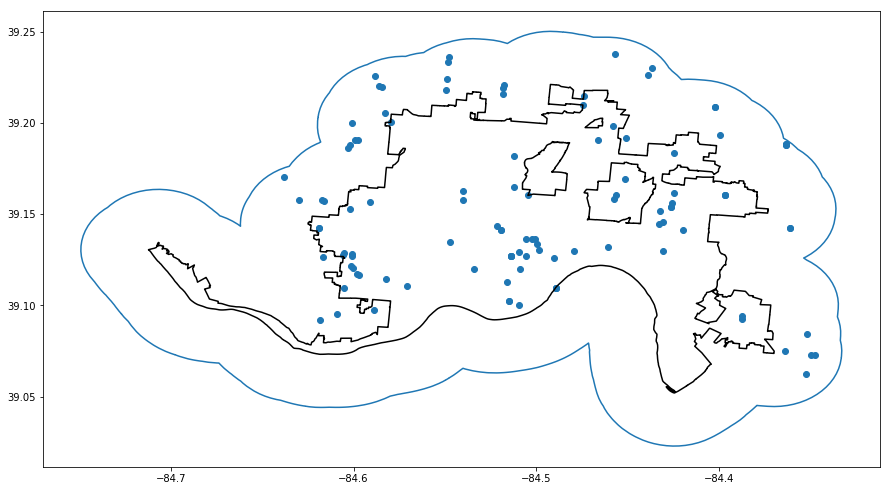

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
geoph_df['geometry'].plot(ax=ax)

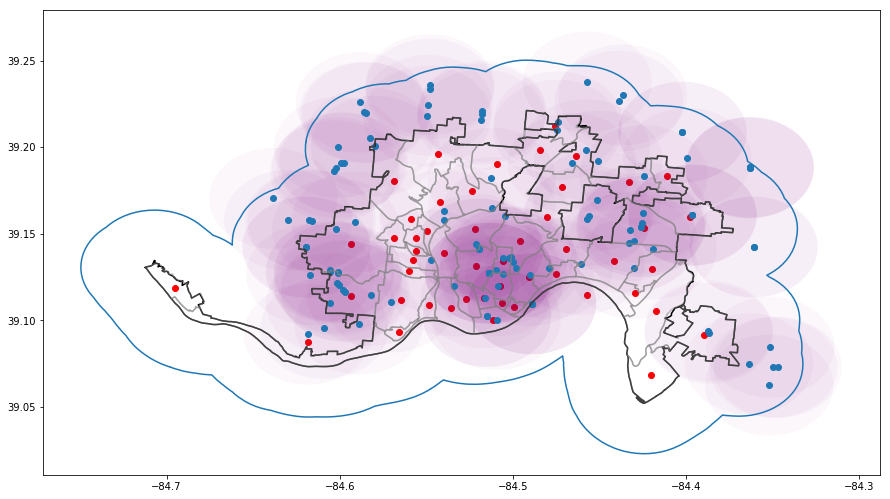

In [512]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
cinneigh.boundary.plot(ax=ax, color='grey', alpha=0.5)
cinneigh.centroid.plot(ax=ax, color='red')
cinPConvertedB.plot(ax=ax, color='purple',alpha=0.03)
geoph_df.plot(ax=ax)

**KY Pharmacies


In [26]:
medFacCindf['PharmCount2mi'] = counting_facilities_cn(geoph_df)

medFacCindf.head()

{'North Avondale - Paddock Hills': 6, 'Avondale': 19, 'Bond Hill': 6, 'California': 0, 'Camp Washington': 13, 'Carthage': 6, 'Clifton': 19, 'College Hill': 5, 'Columbia Tusculum': 3, 'Corryville': 23, 'CUF': 19, 'Downtown': 14, 'East End': 7, 'East Price Hill': 7, 'East Walnut Hills': 14, 'East Westwood': 5, 'English Woods': 7, 'Evanston': 11, 'Hartwell': 5, 'Hyde Park': 11, 'Kennedy Heights': 8, 'Linwood': 3, 'Lower Price Hill': 7, 'Madisonville': 10, 'Millvale': 5, 'Mt. Adams': 21, 'Mt. Airy': 7, 'Mt. Auburn': 25, 'Mt. Lookout': 8, 'Mt. Washington': 3, 'North Fairmount': 5, 'Northside': 5, 'Oakley': 15, 'Over-the-Rhine': 23, 'Pendleton': 21, 'Pleasant Ridge': 12, 'Queensgate': 12, 'Riverside': 4, 'Villages at Roll Hill': 4, 'Roselawn': 6, 'Sayler Park': 0, 'Sedamsville': 3, 'South Cumminsville': 6, 'South Fairmount': 4, 'Spring Grove Village': 5, 'Walnut Hills': 22, 'West End': 15, 'Westwood': 15, 'Winton Hills': 3, 'West Price Hill': 14}


,NeighborhoodName,NeighborhoodNum,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi
0,Queensgate,30,4,0,4,2,0,0,0,1,1,10,8,1,4,0,6
1,Roselawn,1,6,0,3,3,2,1,2,5,6,19,12,0,4,0,19
2,Kennedy Heights,2,1,1,3,2,0,0,0,1,0,8,5,1,0,0,6
3,Pleasant Ridge,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,Westwood,4,2,0,0,1,2,0,1,1,1,12,6,0,0,0,13


# Drug Drop Off

National Drug Drop Locations
https://www.arcgis.com/home/item.html?id=7726ad6095c543b2a75ffae24b27e419#visualize

Walgreen Drug Drop Locations
https://opioidepidemic.maps.arcgis.com/home/item.html?id=835b14782ffb4c259c3c2913e68ca0ef#overview
https://services5.arcgis.com/cd1xypoX1AbRtEm7/arcgis/rest/services/KioskDisposal_Final/FeatureServer/0

**Includes KY data

In [27]:
url = 'https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/1/query?where=%28name%3D%27Dayton+Police+Department%27%29+OR+%28name%3D%27Bellevue+Police+Department%27%29+OR+%28name%3D%27Newport+Police+Department%27%29+OR+%28name%3D%27Ft.+Thomas+Police+Department%27%29+OR+%28name%3D%27Park+Hills+Pollice+Department%27%29+OR+%28name%3D%27Southgate+Police+Department%27%29+OR+%28name%3D%27Villa+Hills+Police+Department%27%29+OR+%28name%3D%27Covington+Police+Department%27%29+OR+%28name%3D%27Ft.+Wright+Police+Department%27%29+OR+%28name%3D%27Wilder+Police+Department%27%29+OR+%28municipality%3D%27CINCINNATI%27%29+OR+%28municipality%3D%27NORWOOD%27%29&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

resp = requests.get(url)
print(resp)

data_raw = resp.json()

CNdd_data = pd.io.json.json_normalize(data_raw['features'])

desired_cols = ['attributes.name','attributes.fulladdr','attributes.municipality']

CNdd_df = CNdd_data[desired_cols]

CNdd_df.columns =['Name','FullAddr','City']

CNdd_df = CNdd_df[:-3]


<Response [200]>


In [28]:
url = 'https://services5.arcgis.com/cd1xypoX1AbRtEm7/arcgis/rest/services/KioskDisposal_Final/FeatureServer/0/query?where=%28CITY+%3D+%27CINCINNATI%27%29+OR+%28CITY+%3D+%27FLORENCE%27%29&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()

CNddWAL_data = pd.io.json.json_normalize(data_raw['features'])

CNddWAL_data.columns

desired_cols = ['attributes.STORE_NBR','attributes.ADDRESS_LINE_1','attributes.CITY','attributes.STATE_ABBV']

CNddWAL_df = CNddWAL_data[desired_cols]

CNddWAL_df.columns =['StoreNbr','FullAddr','City','State']

CNddWAL_df['Name'] = 'Walgreens'



<Response [200]>


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
CNddWAL_df1 = CNddWAL_df[CNddWAL_df['State'] == 'OH']
CNddWAL_df2 = CNddWAL_df[CNddWAL_df['State'] == 'KY']

CNddWAL_df = pd.concat([CNddWAL_df1, CNddWAL_df2],axis=0,
                       ignore_index=True,sort=False)

CNddWAL_df

,StoreNbr,FullAddr,City,State,Name
0,11630,6918 HAMILTON AVE,CINCINNATI,OH,Walgreens
1,12830,3 W CORRY ST,CINCINNATI,OH,Walgreens
2,4245,5403 N BEND RD,CINCINNATI,OH,Walgreens
3,4246,2320 BOUDINOT AVE,CINCINNATI,OH,Walgreens
4,4522,9775 COLERAIN AVE,CINCINNATI,OH,Walgreens
5,2694,385 NORTHLAND BLVD,CINCINNATI,OH,Walgreens
6,5763,8193 MALL RD,FLORENCE,KY,Walgreens


In [30]:
CNdd_df

,Name,FullAddr,City
0,Covington Police Department,None,None
1,Dayton Police Department,None,None
2,Ft. Thomas Police Department,None,None
3,Ft. Wright Police Department,None,None
4,Newport Police Department,None,None
5,Park Hills Pollice Department,None,None
6,Southgate Police Department,None,None
7,Villa Hills Police Department,None,None
8,Wilder Police Department,None,None
9,Bellevue Police Department,None,None


In [31]:
CNddWAL_df = CNddWAL_df[CNddWAL_df['FullAddr']!= '2320 BOUDINOT AVE']
CNddWAL_df = CNddWAL_df[CNddWAL_df['FullAddr']!= '9775 COLERAIN AVE']

CNdd_df = pd.concat([CNdd_df, CNddWAL_df],axis=0,
                       ignore_index=True,sort=False)

CNdd_df

,Name,FullAddr,City,StoreNbr,State
0,Covington Police Department,None,None,NaN,NaN
1,Dayton Police Department,None,None,NaN,NaN
2,Ft. Thomas Police Department,None,None,NaN,NaN
3,Ft. Wright Police Department,None,None,NaN,NaN
4,Newport Police Department,None,None,NaN,NaN
5,Park Hills Pollice Department,None,None,NaN,NaN
6,Southgate Police Department,None,None,NaN,NaN
7,Villa Hills Police Department,None,None,NaN,NaN
8,Wilder Police Department,None,None,NaN,NaN
9,Bellevue Police Department,None,None,NaN,NaN


In [32]:
crs = {'init': 'epsg:4326'}
def drugdrop_address_cn(df):
    """takes dataframe and returns the latitude and longitude and makes geopandas dataframe 
    Args:
        df (dataframe) - dataframe to get addresses from
    Returns:
        geo_df - new geopandas dataframe that has the latitude and longitude of the points
    """
    new_df = pd.DataFrame()
    addresses = []
    lats = []
    longs = []
    c_df = df
    c_df.reset_index(inplace=True)
    c_df.drop(['index'], axis=1, inplace=True)

    geolocator = Nominatim(user_agent="my_app", format_string='%s, OH')
    for i in range(len(c_df)):
        #print(c_df.loc[i,'City'])
        address = c_df.loc[i,'FullAddr']
        state = c_df.loc[i, 'State']
        #print(address)
        name = c_df.loc[i, 'Name']
        if state == 'KY':
            geolocator = Nominatim(user_agent="my_app", format_string='%s, KY')
        location = geolocator.geocode(address)
        #print(location)
        if name == 'Covington Police Department':
                address = '1 Police Memorial Dr'
                lat= float(39.067168)
                long = float(-84.506221)
        elif name == 'Dayton Police Department':
                address = '514 6th Ave'
                lat= float(39.112319)
                long = float(-84.473531)
        elif name == 'Bellevue Police Department':
                address = '616 Poplar St'
                lat= float(39.106398)
                long = float(-84.478687)
        elif name == 'Ft. Thomas Police Department':
                address = '130 N Ft Thomas Ave'
                lat = float(39.081129)
                long = float(-84.448954)
        elif name == 'Newport Police Department':
                address = '998 Monmouth St'
                lat= float(39.067168)
                long = float(-84.506221)
        elif name == 'Park Hills Pollice Department':
                address = '1106 Amsterdam Rd'
                lat= float(39.081099)
                long = float(-84.448953)
        elif name == 'Southgate Police Department':
                address = '301 W Walnut St'
                lat= float(39.066238)
                long = float(-84.480746)
        elif name == 'Villa Hills Police Department':
                address = '719 Rogers Rd'
                lat= float(39.052315)
                long = float(-84.597368)
        elif name == 'Ft. Wright Police Department':
                address = '409 Kyles Ln'
                lat= float(39.051953)
                long = float(-84.536246)
        elif name == 'Wilder Police Department':
                address = '520 Licking Pike'
                lat= float(39.054794)
                long = float(-84.488206)
        else:
            lat = location.latitude
            long = location.longitude
        addresses.append(address)
        lats.append(lat)
        longs.append(long)
    c_df['Lat'] = lats
    c_df['Long'] = longs
    new_df = c_df
    new_df['FullAddr'] = addresses
    geometry = [Point(xy) for xy in zip(new_df['Long'],new_df['Lat'])]
    geo_df = gpd.GeoDataFrame(new_df, crs = crs, geometry = geometry)
    return(geo_df)

In [34]:
geoCNdd_df = drugdrop_address_cn(CNdd_df)
geoCNdd_df

,Name,FullAddr,City,StoreNbr,State,Lat,Long,geometry
0,Covington Police Department,1 Police Memorial Dr,None,NaN,NaN,39.067168,-84.506221,POINT (-84.50622 39.06717)
1,Dayton Police Department,514 6th Ave,None,NaN,NaN,39.112319,-84.473531,POINT (-84.47353 39.11232)
2,Ft. Thomas Police Department,130 N Ft Thomas Ave,None,NaN,NaN,39.081129,-84.448954,POINT (-84.44895 39.08113)
3,Ft. Wright Police Department,409 Kyles Ln,None,NaN,NaN,39.051953,-84.536246,POINT (-84.53625 39.05195)
4,Newport Police Department,998 Monmouth St,None,NaN,NaN,39.067168,-84.506221,POINT (-84.50622 39.06717)
5,Park Hills Pollice Department,1106 Amsterdam Rd,None,NaN,NaN,39.081099,-84.448953,POINT (-84.44895 39.08110)
6,Southgate Police Department,301 W Walnut St,None,NaN,NaN,39.066238,-84.480746,POINT (-84.48075 39.06624)
7,Villa Hills Police Department,719 Rogers Rd,None,NaN,NaN,39.052315,-84.597368,POINT (-84.59737 39.05232)
8,Wilder Police Department,520 Licking Pike,None,NaN,NaN,39.054794,-84.488206,POINT (-84.48821 39.05479)
9,Bellevue Police Department,616 Poplar St,None,NaN,NaN,39.106398,-84.478687,POINT (-84.47869 39.10640)


In [35]:
geoCNdd_df = facility_within_cinbuffer(geoCNdd_df, cinbdry_2mi)
len(geoCNdd_df)

12

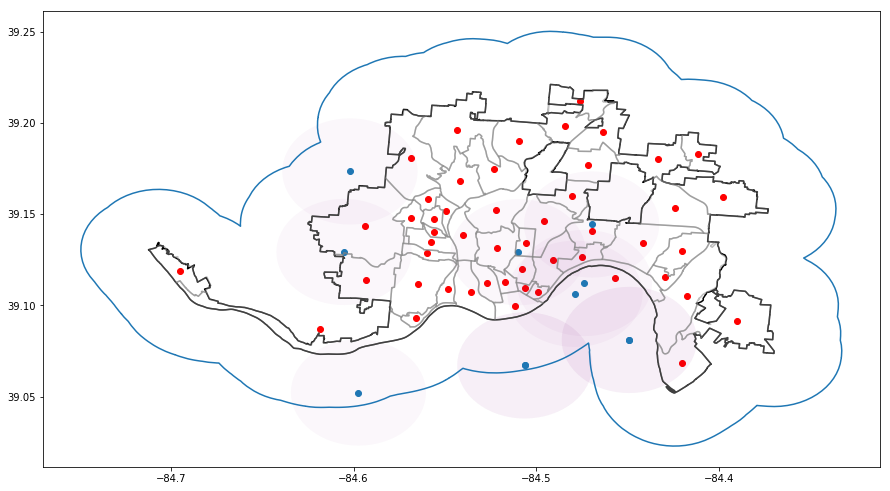

In [503]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
cinneigh.boundary.plot(ax=ax, color='grey', alpha=0.5)
cinneigh.centroid.plot(ax=ax, color='red')
cinDDConvertedB.plot(ax=ax, color='purple',alpha=0.03)
geoCNdd_df.plot(ax=ax)

In [36]:
medFacCindf['DrugDropCount2mi'] = counting_facilities_cn(geoCNdd_df)

medFacCindf

{'North Avondale - Paddock Hills': 1, 'Avondale': 2, 'Bond Hill': 0, 'California': 2, 'Camp Washington': 1, 'Carthage': 0, 'Clifton': 2, 'College Hill': 0, 'Columbia Tusculum': 0, 'Corryville': 2, 'CUF': 1, 'Downtown': 1, 'East End': 2, 'East Price Hill': 0, 'East Walnut Hills': 4, 'East Westwood': 1, 'English Woods': 1, 'Evanston': 2, 'Hartwell': 0, 'Hyde Park': 1, 'Kennedy Heights': 0, 'Linwood': 0, 'Lower Price Hill': 0, 'Madisonville': 0, 'Millvale': 1, 'Mt. Adams': 3, 'Mt. Airy': 2, 'Mt. Auburn': 3, 'Mt. Lookout': 0, 'Mt. Washington': 0, 'North Fairmount': 0, 'Northside': 1, 'Oakley': 0, 'Over-the-Rhine': 1, 'Pendleton': 3, 'Pleasant Ridge': 0, 'Queensgate': 0, 'Riverside': 0, 'Villages at Roll Hill': 1, 'Roselawn': 0, 'Sayler Park': 0, 'Sedamsville': 0, 'South Cumminsville': 1, 'South Fairmount': 0, 'Spring Grove Village': 1, 'Walnut Hills': 4, 'West End': 1, 'Westwood': 1, 'Winton Hills': 0, 'West Price Hill': 1}


,NeighborhoodName,NeighborhoodNum,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi
0,Queensgate,30,4,0,4,2,0,0,0,1,1,10,8,1,4,0,6,1
1,Roselawn,1,6,0,3,3,2,1,2,5,6,19,12,0,4,0,19,2
2,Kennedy Heights,2,1,1,3,2,0,0,0,1,0,8,5,1,0,0,6,0
3,Pleasant Ridge,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2
4,Westwood,4,2,0,0,1,2,0,1,1,1,12,6,0,0,0,13,1
5,Lower Price Hill,5,2,1,0,0,0,0,0,1,0,4,6,2,0,0,6,0
6,Mt. Washington,6,4,0,3,2,1,0,1,2,4,17,7,0,3,0,19,2
7,Over-the-Rhine,7,0,0,0,0,0,0,0,0,0,4,5,1,0,0,5,0
8,California,8,0,0,0,0,0,0,0,0,0,3,1,0,0,0,3,0
9,College Hill,9,6,0,3,2,2,1,2,5,6,23,8,1,4,0,23,2


# Naloxone Pharmacies
https://www.pharmacy.ohio.gov/Licensing/NaloxonePharmacy.aspx

KY:
https://www.arcgis.com/home/webmap/viewer.html?url=https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/0&source=sd

In [9]:
from geopy.geocoders import Nominatim

In [101]:
oh_nal = pd.read_csv('cincinnati/OHIO_NALOXONE_PHARMACIES.csv')
oh_nal.head()

,LicenseNumber,Phone,BusinessName,LocationStreetAddress,LocationCity,LocationState,LocationZip,LocationCounty
0,21220950,(513) 732-5084,HEALTHSOURCE SEAMAN PHARMACY,218 STERN DRIVE,SEAMAN,OH,45679,Adams
1,22424300,(937) 544-8989,SOMC PHARMACY WEST UNION,90 CIC BOULEVARD,WEST UNION,OH,45693,Adams
2,20599350,(479) 204-2258,WAL-MART PHARMACY 10-1368,11217 STATE ROUTE 41,WEST UNION,OH,45693,Adams
3,22833400,(401) 765-1500,CVS/PHARMACY #11213,126 N. MAIN STREET,BLUFFTON,OH,45817,Allen
4,20961050,(401) 765-1500,CVS/PHARMACY #4445,2620 W. BREESE RD.,LIMA,OH,45806,Allen


In [102]:
oh_nal = oh_nal[oh_nal['LocationCounty'] == 'Hamilton']
oh_nal.head()

,LicenseNumber,Phone,BusinessName,LocationStreetAddress,LocationCity,LocationState,LocationZip,LocationCounty
711,22463050,(513) 862-3550,BETHESDA NORTH APOTHECARY,10500 MONTGOMERY RD,CINCINNATI,OH,45242,Hamilton
712,20253100,(513) 263-8760,CANN MEDICAL CENTER,5818 Madison Rd,Cincinnati,OH,45227-1708,Hamilton
713,20345000,5133523094,CINCINNATI HEALTH DEPARTMENT,1525 ELM STREET ELM STREET HEALTH CENTER,CINCINNATI,OH,45202,Hamilton
714,21236200,(513) 346-7942,COSTCO PHARMACY #379,1100 EAST KEMPER ROAD,SPRINGDALE,OH,45246,Hamilton
715,21183200,(513) 774-9239,COSTCO PHARMACY #384,9691 WATERSTONE BLVD,CINCINNATI,OH,45249,Hamilton


In [103]:
oh_nal['FullAddr'] = oh_nal[oh_nal.columns[3:6]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

oh_nal.head()

,LicenseNumber,Phone,BusinessName,LocationStreetAddress,LocationCity,LocationState,LocationZip,LocationCounty,FullAddr
711,22463050,(513) 862-3550,BETHESDA NORTH APOTHECARY,10500 MONTGOMERY RD,CINCINNATI,OH,45242,Hamilton,"10500 MONTGOMERY RD, CINCINNATI, OH"
712,20253100,(513) 263-8760,CANN MEDICAL CENTER,5818 Madison Rd,Cincinnati,OH,45227-1708,Hamilton,"5818 Madison Rd, Cincinnati, OH"
713,20345000,5133523094,CINCINNATI HEALTH DEPARTMENT,1525 ELM STREET ELM STREET HEALTH CENTER,CINCINNATI,OH,45202,Hamilton,"1525 ELM STREET ELM STREET HEALTH CENTER, CINC..."
714,21236200,(513) 346-7942,COSTCO PHARMACY #379,1100 EAST KEMPER ROAD,SPRINGDALE,OH,45246,Hamilton,"1100 EAST KEMPER ROAD, SPRINGDALE, OH"
715,21183200,(513) 774-9239,COSTCO PHARMACY #384,9691 WATERSTONE BLVD,CINCINNATI,OH,45249,Hamilton,"9691 WATERSTONE BLVD, CINCINNATI, OH"


In [104]:
crs = {'init': 'epsg:4326'}
def naloxone_address_cn(df):
    """takes dataframe and returns the latitude and longitude and makes geopandas dataframe 
    Args:
        df (dataframe) - dataframe to get addresses from
    Returns:
        geo_df - new geopandas dataframe that has the latitude and longitude of the points
    """
    new_df = pd.DataFrame()

    lats = []
    longs = []
    c_df = df
    c_df.reset_index(inplace=True)
    c_df.drop(['index'], axis=1, inplace=True)

    geolocator = Nominatim(user_agent="my_app")
    for i in range(len(c_df)):
        #print(c_df.loc[i,'City'])
        address = c_df.loc[i,'FullAddr']
        if address == '1525 ELM STREET ELM STREET HEALTH CENTER, CINCINNATI, OH':
            address = '1525 ELM STREET, CINCINNATI, OH'
        if address == '9691 WATERSTONE BLVD, CINCINNATI, OH':
            address = '9691 WATERSTONE BLVD'
        if address == '9525 KENWOOD ROAD SUITE 1, CINCINNATI, OH':
            address = '9525 KENWOOD ROAD #1, CINCINNATI, OH'
        if address == '17 WILLIAM H. TAFT ROAD, CINCINNATI, OH':
            address = '17 WILLIAM HOWARD TAFT ROAD, CINCINNATI, OH'
        if address == '10554 LOVELAND-MADERIA ROAD, LOVELAND, OH':
            address = '10554 LOVELAND-MADEIRA ROAD, LOVELAND, OH'
        if address == '11930 KEMPER SPRINGS DR., STE 100, CINCINNATI, OH':
            address = '11930 KEMPER SPRINGS DR, OHIO'
        if address == '3636 Springdale Rd, Cincinnati, OH':
            address = '3636 Springdale Rd, OH'
        if address == '800 LOVELAND-MADEIRA RD., LOVELAND, OH':
            address = '800 LOVELAND-MADEIRA RD, LOVELAND, OH'
        if address == '7385 WOOSTER ROAD, MARIEMONT, OH':
            address = '7385 WOOSTER PIKE, MARIEMONT, OH'
        if address == '1212 W. KEMPER ROAD, CINCINNATI, OH':
            address = '1212 W. KEMPER ROAD, OH'
        if address == '5080 DELHI PIKE, CINCINNATI, OH':
            address = '5080 DELHI PIKE, OH'
        if address == '4100 HUNT ROAD, CINCINNATI, OH':
            address = '4100 HUNT ROAD, OH 45236'
        if address == '3711 STONE CREEK BLVD, CINCINNATI, OH':
            address = '3711 STONE CREEK BLVD, OH'
        if address == '3300 MERCY HEALTH BLVD., CINCINNATI, OH':
            address = '3300 MERCY HEALTH BLVD., OH'
        if address == '7500 STATE ROAD, CINCINNATI, OH':
            address = '7500 STATE ROAD, OH'
        if address == '2136 W. 8TH STREET CINCINNATI HEALTH DEPT., CINCINNATI, OH':
            address = '2136 W. 8TH STREET, OH 45204'
        if address == '815 CLEPPER LANE, EASTGATE SQUARE, CINCINNATI, OH':
            address = '815 CLEPPER LANE, OH'
        if address == '800 KEMPER COMMONS CIRCLE, CINCINNATI, OH':
            address = '800 KEMPER COMMONS CIRCLE, OH'
        if address == '2139 AUBURN AVE. SUITE 1005, CINCINNATI, OH':
            address = '2139 AUBURN AVE. #1005, CINCINNATI, OH'
        if address == 'EDEN & ALBERT SABIN WAY, ML #443, CINCINNATI, OH':
            address = '200 Albert Sabin Way Cincinnati, Ohio 45219'
        if address == '3130 HIGHLAND AVE., RM G200, CINCINNATI, OH':
            address = '3130 HIGHLAND AVE, CINCINNATI, OH'
        if address == '234 GOODMAN ST., ML 0740, CINCINNATI, OH':
            address = '234 GOODMAN ST., CINCINNATI, OH'
        if address == '4000 REDBANK RD., CINCINNATI, OH':
            address = '4000 RED BANK RD., CINCINNATI, OH'
        if address == '1143 SMILEY AVENUE, CINCINNATI, OH':
            address = '1143 SMILEY AVENUE, OH'
        if address == '2801 CUNNINGHAM DRIVE, CINCINNATI, OH':
            address = '2801 CUNNINGHAM DRIVE, OH 45241'
        if address == '385 NORTHLAND BLVD., CINCINNATI, OH':
            address = '385 NORTHLAND BLVD, OH 45240'
        if address == '2335 JOHN GRAY ROAD, CINCINNATI, OH':
            address = '2335 JOHN GRAY ROAD, OH'
        if address == '5508 BRIDGETOWN ROAD, CINCINNATI, OH':
            address = '5508 BRIDGETOWN ROAD, OH'
        if address == '6385 BRANCH HILL GUINEA PIKE, LOVELAND, OH':
            address = '6385 BRANCH HILL GUINEA PIKE, OH'
        if address == '1982 EIGHT MILE RD, CINCINNATI, OH':
            address = '1982 EIGHT MILE RD, OH'
        #print(address)
        location = geolocator.geocode(address)
        #print(location)
        if address == '4001 S.R. #128, CLEVES, OH':
            lat= float(39.172316)
            long = float(-84.760455)
        else:
            lat = location.latitude
            long = location.longitude
        lats.append(lat)
        longs.append(long)
    c_df['Lat'] = lats
    c_df['Long'] = longs
    new_df = c_df
    geometry = [Point(xy) for xy in zip(new_df['Long'],new_df['Lat'])]
    geo_df = gpd.GeoDataFrame(new_df, crs = crs, geometry = geometry)
    return(geo_df)

In [105]:
geon_df = naloxone_address_cn(oh_nal)

In [106]:
#cinbdry_2mi = buffer_mi(cinbdry, 2)

geocn_df = facility_within_cinbuffer(geon_df, cinbdry_2mi)
len(geocn_df)

96

In [107]:
geocn_df.to_csv(r'DataFiles/FacilityData/CinNaloxoneLocations.csv')

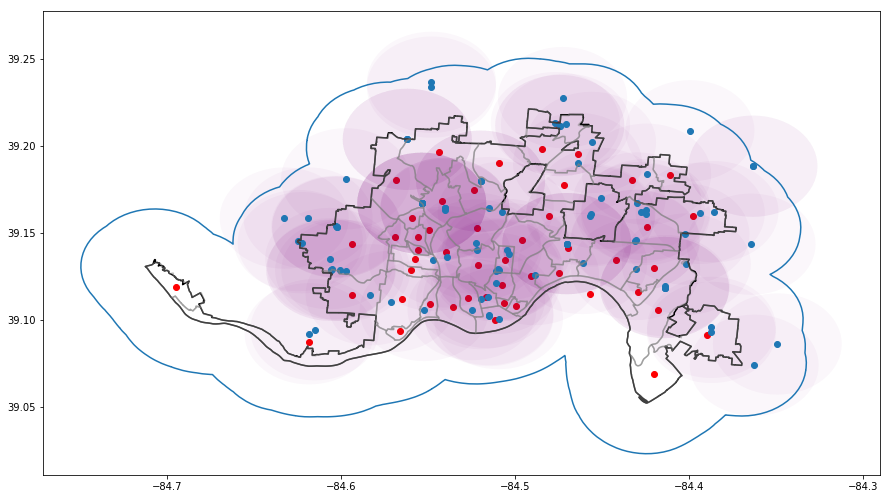

In [466]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
cinneigh.boundary.plot(ax=ax, color='grey', alpha=0.5)
cinneigh.centroid.plot(ax=ax, color='red')
cinNConvertedB.plot(ax=ax, color='purple',alpha=0.03)
geocn_df.plot(ax=ax)

**KY Data

In [108]:
url = 'https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/0/query?where=%28municipality+%3D+%27HIGHLAND HEIGHTS%27%29+OR+%28municipality+%3D+%27NEWPORT%27%29+OR+%28municipality+%3D+%27COVINGTON%27%29+OR+%28municipality+%3D+%27FT+WRIGHT%27%29+OR+%28municipality+%3D+%27CRESCENT+SPRINGS%27%29&objectIds=&time=&geometry=&geometryType=esriGeometryPolygon&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Kilometer&returnGeodetic=true&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=true&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=true&returnM=true&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

resp = requests.get(url)
data_raw = resp.json()

ky_data = pd.io.json.json_normalize(data_raw['features'])
ky_data.columns

Index(['attributes.CreationDate', 'attributes.Creator', 'attributes.EditDate',
       'attributes.Editor', 'attributes.GlobalID', 'attributes.OBJECTID',
       'attributes.PhoneNumber', 'attributes.PrescriptionNeeded',
       'attributes.Reviewed', 'attributes.Source', 'attributes.agencyurl',
       'attributes.comments', 'attributes.fulladdr', 'attributes.municipality',
       'attributes.name', 'attributes.operdays', 'attributes.operhours',
       'attributes.phone', 'attributes.pocemail', 'attributes.pocname',
       'attributes.pocphone', 'geometry.x', 'geometry.y'],
      dtype='object')

In [109]:
desired_cols = ['attributes.name',
               'attributes.fulladdr',
               'attributes.municipality']

ky_df = ky_data[desired_cols]

ky_df.columns =['Name','FullAddr',
                'City']


ky_df = pd.DataFrame(ky_df)

Based on looking at the map found at:
https://www.arcgis.com/home/webmap/viewer.html?url=https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/0&source=sd

The addresses for Newport that are in KY:
    1601 MONMOUTH ST
    160 PAVILION PKWY

for Covington:
    1220 MADISON AVE
    2001 MADISON AVE.
    4299 WINSTON AVE

for FT Wright:
    1825 DIXIE HWY
    3450 VALLEY PLAZA PKWY

for Crescent Springs:
    606 BUTTERMILK PIKE

for Highland Heights:
    2840 ALEXANDRIA PIKE

In [110]:
ky_df.reset_index(inplace=True)
ky_df.drop(['index'], axis=1, inplace=True)

#Pulling matching addresses:

addresses = ['1601 MONMOUTH ST', '160 PAVILION PKWY', '1220 MADISON AVE', '2001 MADISON AVE.', '4299 WINSTON AVE',
          '1825 DIXIE HWY', '3450 VALLEY PLAZA PKWY', '606 BUTTERMILK PIKE', '2840 ALEXANDRIA PIKE']

selected_ky = pd.DataFrame()

for a in addresses:
    df = pd.DataFrame()
    df = ky_df[ky_df['FullAddr'] == a]
    selected_ky = selected_ky.append(df)
  

selected_ky.reset_index(inplace=True)
selected_ky.drop(['index'], axis=1, inplace=True)
selected_ky

,Name,FullAddr,City
0,Walgreens,1601 MONMOUTH ST,NEWPORT
1,CVS Pharmacy,160 PAVILION PKWY,NEWPORT
2,Walgreens,1220 MADISON AVE,COVINGTON
3,CVS Pharmacy,2001 MADISON AVE.,COVINGTON
4,Walgreens,4299 WINSTON AVE,COVINGTON
5,Walgreens,1825 DIXIE HWY,FT WRIGHT
6,Walmart,3450 VALLEY PLAZA PKWY,FT WRIGHT
7,Walgreens,606 BUTTERMILK PIKE,CRESCENT SPRINGS
8,Walgreens,2840 ALEXANDRIA PIKE,HIGHLAND HEIGHTS


In [111]:
crs = {'init': 'epsg:4326'}
def naloxone_address_ky(df):
    """takes dataframe and returns the latitude and longitude and makes geopandas dataframe 
    Args:
        df (dataframe) - dataframe to get addresses from
    Returns:
        geo_df - new geopandas dataframe that has the latitude and longitude of the points
    """
    new_df = pd.DataFrame()

    lats = []
    longs = []
    c_df = df
    c_df.reset_index(inplace=True)
    c_df.drop(['index'], axis=1, inplace=True)

    geolocator = Nominatim(user_agent="my_app", format_string="%s, KY")
    for i in range(len(c_df)):
        #print(c_df.loc[i,'City'])
        address = c_df.loc[i,'FullAddr']
        #print(address)
        location = geolocator.geocode(address)
        #print(location)
        if address == '160 PAVILION PKWY':
            lat = float(39.088085)
            long = float(-84.477893)
        else:
            lat = location.latitude
            long = location.longitude
        lats.append(lat)
        longs.append(long)
    c_df['Lat'] = lats
    c_df['Long'] = longs
    new_df = c_df
    geometry = [Point(xy) for xy in zip(new_df['Long'],new_df['Lat'])]
    geo_df = gpd.GeoDataFrame(new_df, crs = crs, geometry = geometry)
    return(geo_df)

In [112]:
geoky_df = naloxone_address_ky(selected_ky)
geoky_df.head()

,Name,FullAddr,City,Lat,Long,geometry
0,Walgreens,1601 MONMOUTH ST,NEWPORT,39.084054,-84.484237,POINT (-84.48424 39.08405)
1,CVS Pharmacy,160 PAVILION PKWY,NEWPORT,39.088085,-84.477893,POINT (-84.47789 39.08808)
2,Walgreens,1220 MADISON AVE,COVINGTON,39.077394,-84.508435,POINT (-84.50843 39.07739)
3,CVS Pharmacy,2001 MADISON AVE.,COVINGTON,39.066477,-84.506455,POINT (-84.50645 39.06648)
4,Walgreens,4299 WINSTON AVE,COVINGTON,39.041493,-84.506602,POINT (-84.50660 39.04149)


In [113]:
geoky_df = facility_within_cinbuffer(geoky_df, cinbdry_2mi)
len(geoky_df)

6

In [115]:
geoky_df.to_csv(r'DataFiles/FacilityData/KYNaloxoneLocations.csv')

In [114]:
geoCinN_df = pd.concat([geocn_df, geoky_df],axis=0,
                       ignore_index=True,sort=False)
geoCinN_df.head()

,LicenseNumber,Phone,BusinessName,LocationStreetAddress,LocationCity,LocationState,LocationZip,LocationCounty,FullAddr,Lat,Long,geometry,Name,City
0,22463050.0,(513) 862-3550,BETHESDA NORTH APOTHECARY,10500 MONTGOMERY RD,CINCINNATI,OH,45242,Hamilton,"10500 MONTGOMERY RD, CINCINNATI, OH",39.143702,-84.470209,POINT (-84.47021 39.14370),NaN,NaN
1,20253100.0,(513) 263-8760,CANN MEDICAL CENTER,5818 Madison Rd,Cincinnati,OH,45227-1708,Hamilton,"5818 Madison Rd, Cincinnati, OH",39.161121,-84.393476,POINT (-84.39348 39.16112),NaN,NaN
2,20345000.0,5133523094,CINCINNATI HEALTH DEPARTMENT,1525 ELM STREET ELM STREET HEALTH CENTER,CINCINNATI,OH,45202,Hamilton,"1525 ELM STREET ELM STREET HEALTH CENTER, CINC...",39.112119,-84.519647,POINT (-84.51965 39.11212),NaN,NaN
3,22571200.0,(401) 765-1500,CVS PHARMACY #16779,4825A MARBURG AVE.,CINCINNATI,OH,45209,Hamilton,"4825A MARBURG AVE., CINCINNATI, OH",39.163264,-84.424729,POINT (-84.42473 39.16326),NaN,NaN
4,22571300.0,(401) 765-1500,CVS PHARMACY #16873,9040 COLERAIN AVE.,CINCINNATI,OH,45251,Hamilton,"9040 COLERAIN AVE., CINCINNATI, OH",39.166881,-84.553554,POINT (-84.55355 39.16688),NaN,NaN


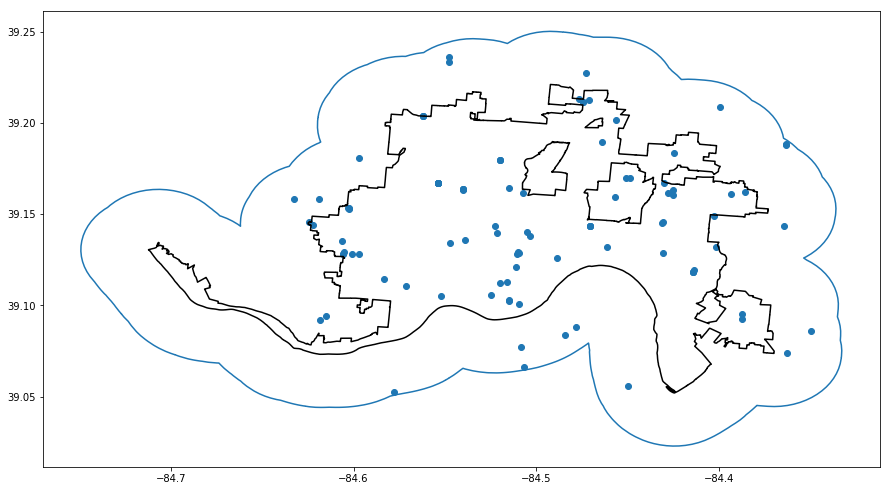

In [530]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinbdry_2mi.boundary.plot(ax=ax)
geoCinN_df.plot(ax=ax)

**Getting counts of Naloxone Distributors within 2mi of a neighborhood centroid

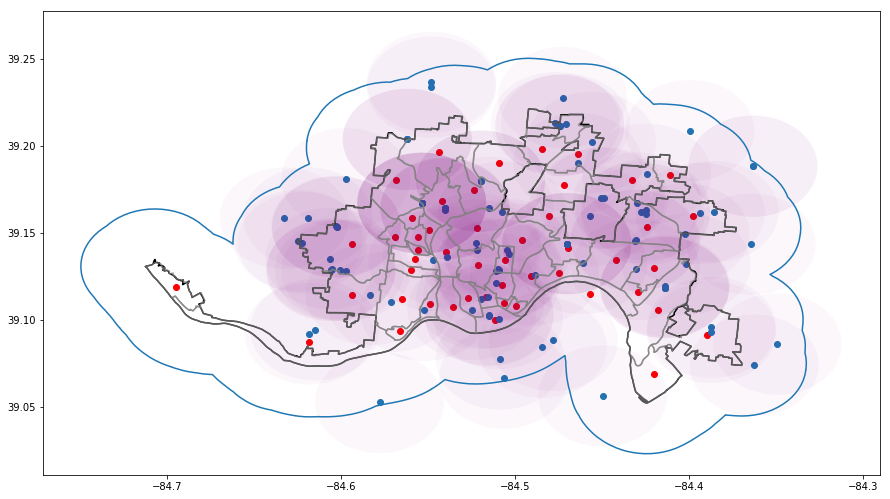

In [533]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.boundary.plot(ax=ax, color='red')
cinbdry.boundary.plot(ax=ax, color='black')
cinneigh.boundary.plot(ax=ax, color='grey',alpha=0.7)
cinneigh.centroid.plot(ax=ax, color='red')
cinbdry_2mi.boundary.plot(ax=ax)
geoCinN_df.plot(ax=ax)
cinNalConvertedB.plot(ax=ax, color='purple', alpha=0.03)

In [50]:
medFacCindf['NaloxoneDistribCount2mi'] = counting_facilities_cn(geoCinN_df)

medFacCindf.head()

{'North Avondale - Paddock Hills': 11, 'Avondale': 15, 'Bond Hill': 5, 'California': 1, 'Camp Washington': 14, 'Carthage': 6, 'Clifton': 25, 'College Hill': 6, 'Columbia Tusculum': 6, 'Corryville': 13, 'CUF': 15, 'Downtown': 12, 'East End': 3, 'East Price Hill': 4, 'East Walnut Hills': 12, 'East Westwood': 16, 'English Woods': 15, 'Evanston': 9, 'Hartwell': 7, 'Hyde Park': 13, 'Kennedy Heights': 8, 'Linwood': 7, 'Lower Price Hill': 10, 'Madisonville': 8, 'Millvale': 15, 'Mt. Adams': 13, 'Mt. Airy': 15, 'Mt. Auburn': 15, 'Mt. Lookout': 9, 'Mt. Washington': 3, 'North Fairmount': 6, 'Northside': 17, 'Oakley': 13, 'Over-the-Rhine': 16, 'Pendleton': 12, 'Pleasant Ridge': 10, 'Queensgate': 12, 'Riverside': 2, 'Villages at Roll Hill': 13, 'Roselawn': 8, 'Sayler Park': 0, 'Sedamsville': 3, 'South Cumminsville': 15, 'South Fairmount': 5, 'Spring Grove Village': 16, 'Walnut Hills': 16, 'West End': 14, 'Westwood': 12, 'Winton Hills': 5, 'West Price Hill': 9}


,NeighborhoodName,NeighborhoodNum,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi
0,Queensgate,30,4,0,4,2,0,0,0,1,1,10,8,1,4,0,6,1,11
1,Roselawn,1,6,0,3,3,2,1,2,5,6,19,12,0,4,0,19,2,15
2,Kennedy Heights,2,1,1,3,2,0,0,0,1,0,8,5,1,0,0,6,0,5
3,Pleasant Ridge,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,1
4,Westwood,4,2,0,0,1,2,0,1,1,1,12,6,0,0,0,13,1,14


In [51]:
medFacCindf['geometry'] = cinneigh['geometry']

medFacCindf.head()

,NeighborhoodName,NeighborhoodNum,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi,geometry
0,Queensgate,30,4,0,4,2,0,0,0,1,1,10,8,1,4,0,6,1,11,"POLYGON ((-84.47349 39.16825, -84.47207 39.168..."
1,Roselawn,1,6,0,3,3,2,1,2,5,6,19,12,0,4,0,19,2,15,"POLYGON ((-84.49471 39.15613, -84.49443 39.156..."
2,Kennedy Heights,2,1,1,3,2,0,0,0,1,0,8,5,1,0,0,6,0,5,"POLYGON ((-84.45880 39.17779, -84.45881 39.177..."
3,Pleasant Ridge,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,1,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ..."
4,Westwood,4,2,0,0,1,2,0,1,1,1,12,6,0,0,0,13,1,14,"POLYGON ((-84.53770 39.15153, -84.53778 39.151..."


In [54]:
with open('DataFiles/countMedicalFacilitiesWithin2milesCinbyNeigh.pkl', 'wb') as pkl_file:
    pkl.dump(medFacCindf, pkl_file)

with open('CINCINcountMedicalFacilitiesWithin2milesCinbyNeigh.pkl', 'wb') as pkl_file:
    pkl.dump(medFacCindf, pkl_file)

In [53]:

medFacCindf.to_csv(r'DataFiles/cntFacilitiesWithin2milesCinbyNeigh.csv')

ValueError: setting an array element with a sequence